In [8]:
import pandas as pd

# Path to your downloaded excel from Wyscout
excel_file_path = '/Users/user/Downloads/Elitettan 2024.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# List of metrics you want to keep
metrics_to_keep = ['Player','Team', 'Position', 'Age', 'Matches played', 'Minutes played','Goals per 90', 'xG per 90', 'Shots on target, %', 'Dribbles per 90', 'Progressive runs per 90',
                  'Defensive duels won, %', 'Aerial duels won, %', 'PAdj Sliding tackles', 'PAdj Interceptions', 'Shots blocked per 90',
                  'xA per 90', 'Key passes per 90', 'Passes to final third per 90', 'Passes to penalty area per 90', 'Through passes per 90', 'Progressive passes per 90']

filtered_df = df[metrics_to_keep]

filtered_df.rename(columns={
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes'
                           }, inplace=True)


# Type the desired name for the new Excel file
output_excel_file = '/Users/user/Downloads/NEW.xlsx'

# Save the filtered DataFrame to a new Excel file
filtered_df.to_excel(output_excel_file, index=False)

print(f"Filtered DataFrame saved to {output_excel_file}")


/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_98809/2934676690.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={


Filtered DataFrame saved to /Users/user/Downloads/NEW.xlsx


⚠️ Logo not found: /Users/user/Logo/.png
⚠️ Logo not found: /Users/user/Logo/Malmö FF.png


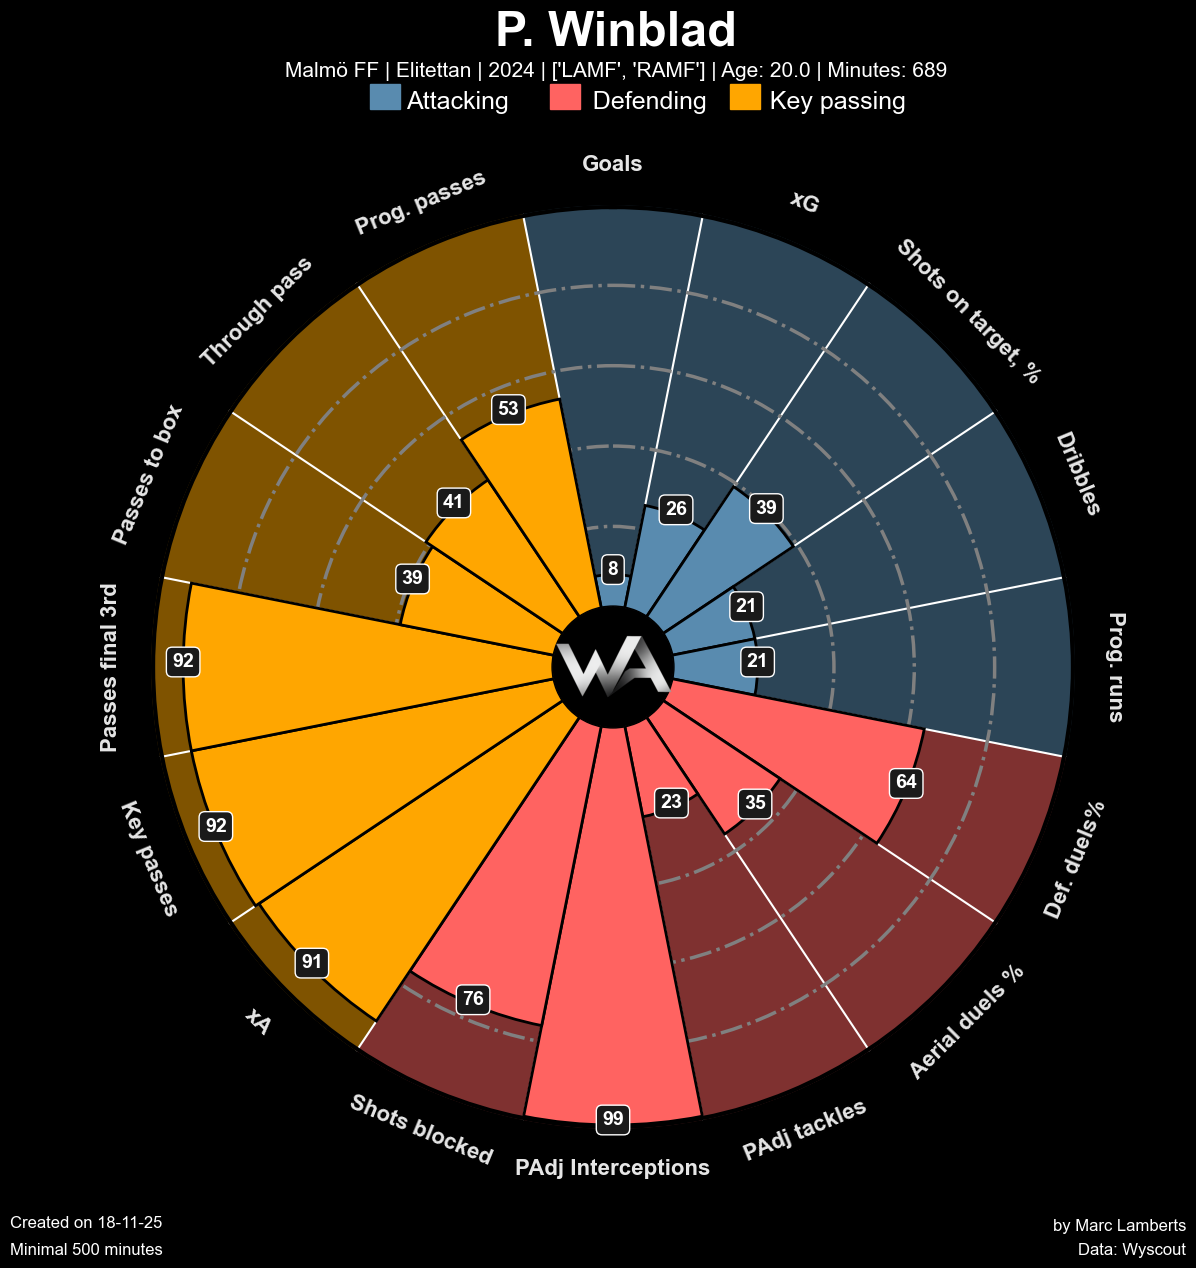

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from datetime import datetime
import os

# --- Hardcode Inputs ---
player_name = "P. Winblad"
league_name = "Elitettan"
season_name = "2024"

# Load data from Excel file
df_original = pd.read_excel('/Users/user/Downloads/NEW.xlsx')

# Filter based on minutes played and position
df_filtered = df_original[df_original['Minutes played'] >= 500]
# Positions to include
positions_to_filter = ['LAMF', 'RAMF']

# Filter positions where any of these appear in 'Position' column
df_filtered = df_filtered[df_filtered['Position'].str.contains('|'.join(positions_to_filter), case=False, na=False)]

# Retrieve the team name before dropping
player_team = df_filtered.loc[df_filtered['Player'] == player_name, 'Team'].values[0]

# Retrieve the player's minutes played and age from the original df
player_minutes = df_original.loc[df_original['Player'] == player_name, 'Minutes played'].values[0]
player_age = df_original.loc[df_original['Player'] == player_name, 'Age'].values[0]

# Drop unnecessary columns
df = df_filtered.drop(['Team', 'Position', 'Age', 'Matches played', 'Minutes played'], axis=1).reset_index()

# Parameters
params = list(df.columns)[2:]

# Player data
player_df = df.loc[df['Player'] == player_name].reset_index()
player = list(player_df.loc[0])[3:]

# Percentile values
values = [math.floor(stats.percentileofscore(df[param], player[i])) for i, param in enumerate(params)]
values = [99 if v == 100 else v for v in values]
average_percentile = round(np.mean(values), 1)

# Initialize PyPizza
baker = PyPizza(
    params=params,
    straight_line_color="white",
    straight_line_lw=1.5,
    last_circle_lw=6,
    other_circle_lw=2.5,
    other_circle_ls="-.",
    inner_circle_size=15
)

# Slice colors and text colors
slice_colors = ["#598BAF"] * 5 + ["#ff6361"] * 5 + ["#ffa600"] * 6
text_colors = ["white"] * 8 + ["black"] * 5

# Load inner-circle logo (center of pizza)
logo_image = plt.imread('/Users/user/Downloads/wa2.png')

# Create pizza plot
fig, ax = baker.make_pizza(
    values,
    figsize=(12, 12),
    param_location=110,
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict(
        edgecolor="black",
        zorder=2,
        linewidth=2
    ),
    kwargs_params=dict(
        color="white", fontsize=16, weight='bold', fontname="Arial",
        va="center", alpha=.9
    ),
    kwargs_values=dict(
        color="white", fontsize=14, weight='bold', fontname="Arial",
        zorder=3,
        bbox=dict(
            edgecolor="white",
            facecolor="#1a1a1a",
            boxstyle="round,pad=0.3",
            lw=1
        )
    )
)

# Set background colors
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Add logo in the center of the pizza
add_image(logo_image, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127, zorder=15)

# --- Add top-left and top-right logos ---
def add_logo(fig, ax, path, position='top right', zoom=0.1):
    if not os.path.exists(path):
        print(f"⚠️ Logo not found: {path}")
        return
    logo_img = plt.imread(path)
    imagebox = OffsetImage(logo_img, zoom=zoom)

    if position == 'top right':
        ab = AnnotationBbox(imagebox, (0.99, 0.99), xycoords='figure fraction',
                            frameon=False, box_alignment=(1, 1))
    elif position == 'top left':
        ab = AnnotationBbox(imagebox, (0.01, 0.99), xycoords='figure fraction',
                            frameon=False, box_alignment=(0, 1))
    else:
        return
    fig.add_artist(ab)

# Add static logo (top-right)
add_logo(fig, ax, '/Users/user/Logo/.png', position='top right', zoom=0.1)

# Add team-specific logo (top-left)
team_logo_path = f'/Users/user/Logo/{player_team}.png'
add_logo(fig, ax, team_logo_path, position='top left', zoom=0.12)

# Title and subtitle
fig.text(
    0.515,
    0.97,
    f"{player_name}\n",
    size=35,
    ha="center",
    color="white",
    weight="bold",
    fontname="Arial",
)

fig.text(
    0.515, 0.95,
    f"{player_team} | {league_name} | {season_name} | {positions_to_filter} | Age: {player_age} | Minutes: {player_minutes}\n\n",
    size=15, ha="center", color="white", fontname="Arial"
)

# Footer text (left)
fig.text(0.01, 0.005, "Minimal 500 minutes", size=12, color="white", fontname="Arial")

# Credits (right)
fig.text(0.99, 0.025, "by Marc Lamberts", size=12, color="white", ha="right", fontname="Arial")
fig.text(0.99, 0.005, "Data: Wyscout", size=12, color="white", ha="right", fontname="Arial")

# Date annotation (left-aligned)
today_date = datetime.today().strftime("%d-%m-%y")
fig.text(
    0.01, 0.025,
    f"Created on {today_date}",
    size=12, color="white", fontname="Arial", ha="left", va="bottom"
)

# Category labels and colored rectangles
fig.text(
    0.34, 0.96, "Attacking            Defending         Key passing", size=18, color="white", fontname="Arial"
)

fig.patches.extend([
    plt.Rectangle((0.31, 0.96), 0.025, 0.021, fill=True, color="#598BAF", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.46, 0.96), 0.025, 0.021, fill=True, color="#ff6361", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.61, 0.96), 0.025, 0.021, fill=True, color="#ffa600", transform=fig.transFigure, figure=fig)
])

# Save and display
plt.savefig('/Users/user/Downloads/Winblad 2024.png', dpi=500, bbox_inches='tight', facecolor='black')
plt.show()  

⚠️ Logo not found: /Users/user/Logo/EersteDivisie.png
✅ Saved: /Users/user/Downloads/J._Nisbet_SoftColors_VerticalLegend_20251028_2053.png


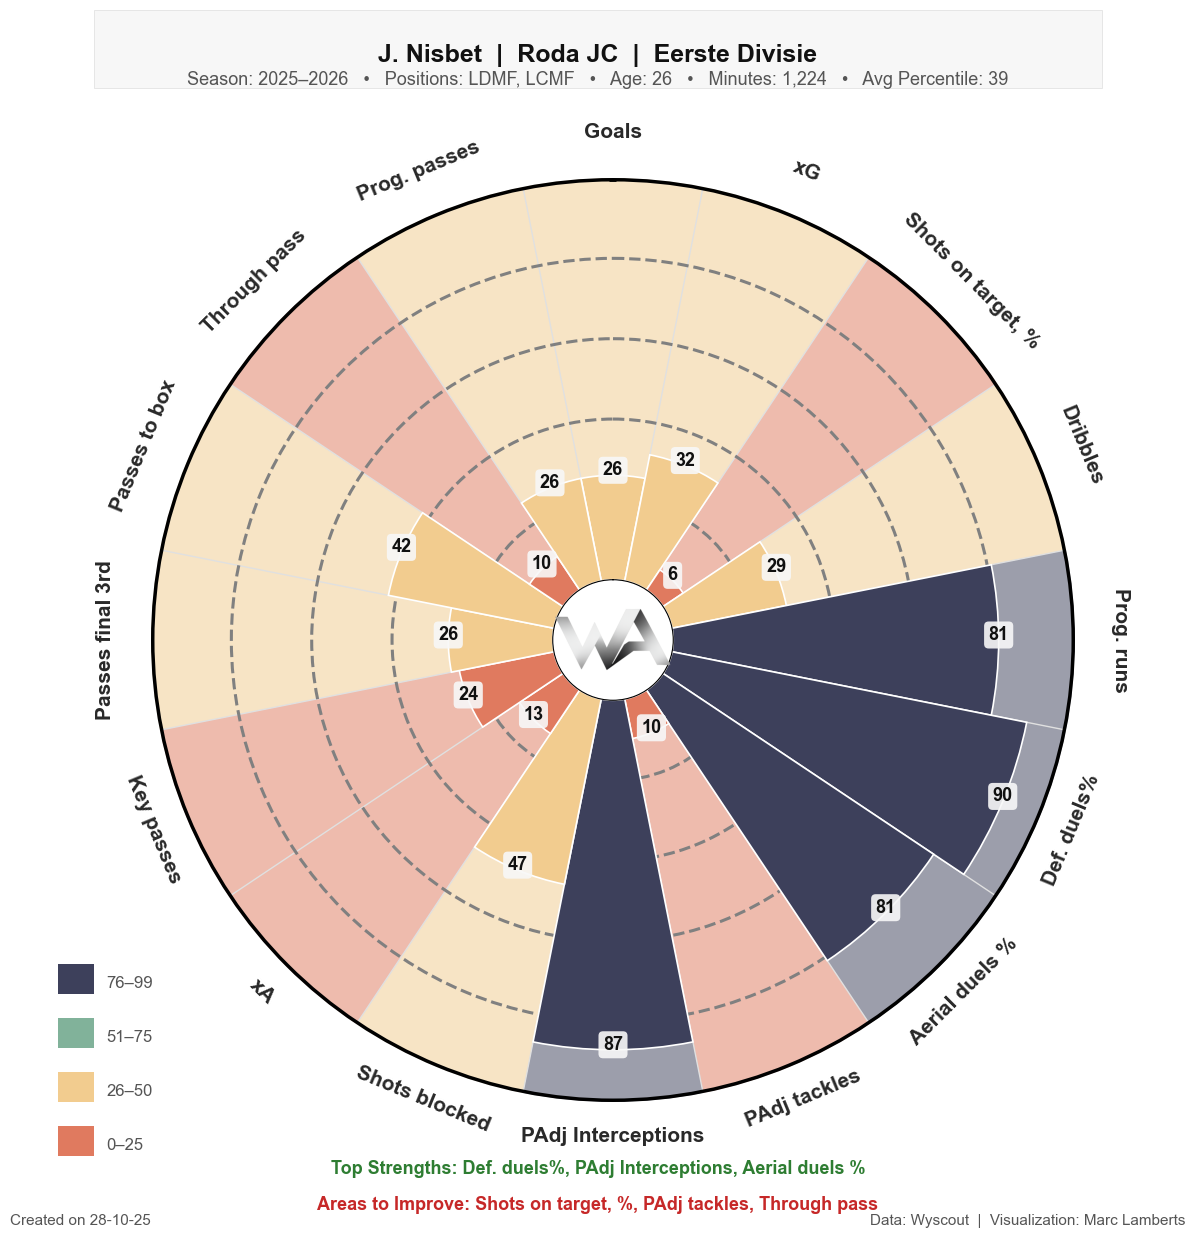

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from datetime import datetime
import os

# =====================================================
# --- CONFIGURATION ---
# =====================================================
PLAYER_NAME = "J. Nisbet"
LEAGUE_NAME = "Eerste Divisie"
SEASON_NAME = "2025–2026"
POSITIONS_TO_FILTER = ["LDMF", "LCMF"]
MIN_MINUTES = 500

EXCEL_PATH = "/Users/user/Downloads/NEW.xlsx"
LOGO_DIR = "/Users/user/Logo/"
CENTER_LOGO = "/Users/user/Downloads/wa2.png"
OUTPUT_DIR = "/Users/user/Downloads/"

# =====================================================
# --- LOAD & FILTER DATA ---
# =====================================================
df_original = pd.read_excel(EXCEL_PATH)
df_filtered = df_original[df_original["Minutes played"] >= MIN_MINUTES].copy()
df_filtered = df_filtered[df_filtered["Position"].str.contains("|".join(POSITIONS_TO_FILTER), case=False, na=False)]

if PLAYER_NAME not in df_filtered["Player"].values:
    raise ValueError(f"Player '{PLAYER_NAME}' not found in dataset.")

player_row = df_original[df_original["Player"] == PLAYER_NAME].iloc[0]
player_team = player_row["Team"]
player_minutes = int(player_row["Minutes played"])
player_age = int(player_row["Age"])

df = df_filtered.drop(
    columns=["Team", "Position", "Age", "Matches played", "Minutes played"],
    errors="ignore"
).reset_index(drop=True)

params = list(df.columns)[1:]
player_stats = df[df["Player"] == PLAYER_NAME].iloc[0, 1:]

# Percentiles (whole numbers)
values = [int(round(stats.percentileofscore(df[param], player_stats[param]))) for param in params]
values = [99 if v == 100 else v for v in values]
average_percentile = int(round(np.mean(values)))

# =====================================================
# --- COLOR PALETTE (Soft and Eye-Friendly) ---
# =====================================================
def get_color(value):
    if value <= 25:
        return "#e07a5f"  # muted coral
    elif value <= 50:
        return "#f2cc8f"  # soft amber
    elif value <= 75:
        return "#81b29a"  # sage green
    else:
        return "#3d405b"  # slate blue-green

slice_colors = [get_color(v) for v in values]

background_color = "#FFFFFF"
text_color = "#111111"
secondary_text = "#555555"

# =====================================================
# --- PIZZA INITIALIZATION ---
# =====================================================
baker = PyPizza(
    params=params,
    straight_line_color="#E0E0E0",
    straight_line_lw=1.0,
    last_circle_lw=5,
    other_circle_lw=2.2,
    other_circle_ls="--",
    inner_circle_size=15
)

# =====================================================
# --- DRAW PIZZA ---
# =====================================================
fig, ax = baker.make_pizza(
    values,
    figsize=(12, 12),
    param_location=110,
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict(edgecolor="#FFFFFF", linewidth=1.2, zorder=2),
    kwargs_params=dict(color=text_color, fontsize=15, weight="bold", fontname="Arial", alpha=0.9),
    kwargs_values=dict(
        color=text_color, fontsize=13, weight="bold", fontname="Arial",
        bbox=dict(edgecolor="none", facecolor="#F8F8F8", boxstyle="round,pad=0.25", alpha=0.9)
    )
)

fig.patch.set_facecolor(background_color)
ax.set_facecolor("#FDFDFD")

# =====================================================
# --- HEADER BOX ---
# =====================================================
fig.patches.extend([
    plt.Rectangle((0.08, 0.955), 0.84, 0.065, fill=True, color="#F7F7F7",
                  transform=fig.transFigure, lw=0.5, ec="#DDDDDD", alpha=0.97)
])

fig.text(
    0.5, 0.982,
    f"{PLAYER_NAME}  |  {player_team}  |  {LEAGUE_NAME}",
    ha="center", va="center", size=18, color=text_color,
    weight="bold", fontname="Arial"
)

fig.text(
    0.5, 0.962,
    f"Season: {SEASON_NAME}   •   Positions: {', '.join(POSITIONS_TO_FILTER)}   •   "
    f"Age: {player_age}   •   Minutes: {player_minutes:,}   •   Avg Percentile: {average_percentile}",
    ha="center", va="center", size=13, color=secondary_text, fontname="Arial"
)

# =====================================================
# --- ADD LOGOS ---
# =====================================================
def add_logo(fig, path, position='top right', zoom=0.1):
    if not os.path.exists(path):
        print(f"⚠️ Logo not found: {path}")
        return
    logo_img = plt.imread(path)
    imagebox = OffsetImage(logo_img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0.99, 0.99), xycoords="figure fraction",
                        frameon=False, box_alignment=(1, 1))
    fig.add_artist(ab)

# Center logo
if os.path.exists(CENTER_LOGO):
    add_image(plt.imread(CENTER_LOGO), fig, left=0.447, bottom=0.432, width=0.13, height=0.127, zorder=15)

# Only top-right league logo
add_logo(fig, os.path.join(LOGO_DIR, "EersteDivisie.png"), position="top right", zoom=0.1)

# =====================================================
# --- ADD SUBTLE BACKGROUND RING ---
# =====================================================
circle = plt.Circle((0, 0), 1.07, transform=ax.transData, color="#F4F4F4", alpha=0.6, zorder=1)
ax.add_artist(circle)

# =====================================================
# --- LEGEND BOX (STACKED VERTICALLY LEFT) ---
# =====================================================
legend_x = 0.05  # Horizontal position on the left
legend_y_start = 0.2  # Starting vertical position
legend_gap = 0.045  # Vertical spacing

legend_items = [
    ("76–99", "#3d405b"),
    ("51–75", "#81b29a"),
    ("26–50", "#f2cc8f"),
    ("0–25", "#e07a5f"),
]

fig.text(legend_x, legend_y_start + 0.18, "", size=14, color=text_color, weight="bold", fontname="Arial")

for i, (label, color) in enumerate(legend_items):
    y_pos = legend_y_start - i * legend_gap
    fig.patches.extend([
        plt.Rectangle((legend_x, y_pos), 0.03, 0.025, fill=True, color=color,
                      transform=fig.transFigure, lw=0, alpha=1)
    ])
    fig.text(legend_x + 0.04, y_pos + 0.005, label, size=12, color=secondary_text, fontname="Arial")

# =====================================================
# --- STRENGTHS & WEAKNESSES ---
# =====================================================
top3 = [params[i] for i in np.argsort(values)[-3:][::-1]]
bottom3 = [params[i] for i in np.argsort(values)[:3]]

fig.text(
    0.5, 0.05,
    f"Top Strengths: {', '.join(top3)}",
    ha="center", color="#2E7D32", fontsize=13, fontname="Arial", weight="bold"
)
fig.text(
    0.5, 0.02,
    f"Areas to Improve: {', '.join(bottom3)}",
    ha="center", color="#C62828", fontsize=13, fontname="Arial", weight="bold"
)

# =====================================================
# --- FOOTER / CREDITS ---
# =====================================================
today_date = datetime.today().strftime("%d-%m-%y")

fig.text(0.01, 0.005, f"Created on {today_date}",
         size=11, color=secondary_text, fontname="Arial", va="bottom")

fig.text(0.99, 0.005, "Data: Wyscout  |  Visualization: Marc Lamberts",
         size=11, color=secondary_text, ha="right", fontname="Arial", va="bottom")

# =====================================================
# --- SAVE & DISPLAY ---
# =====================================================
output_filename = f"{PLAYER_NAME.replace(' ', '_')}_SoftColors_VerticalLegend_{datetime.now().strftime('%Y%m%d_%H%M')}.png"
output_path = os.path.join(OUTPUT_DIR, output_filename)

plt.savefig(output_path, dpi=500, bbox_inches="tight", facecolor=background_color)
print(f"✅ Saved: {output_path}")

plt.show()
